In [8]:
using LinearAlgebra, Plots, Statistics
pythonplot();

In [86]:
function normcol!(A)
    for col in eachcol(A)
        col ./= norm(col)
    end;
    return A
end;
normcol(A) = normcol!(copy(A));

rankBound(n, d) = Int(floor(n.^d/factorial(d+1)));
catalecticant(n, d) = Int(binomial(n-1+d, d)-n);
rankBound2(n, d) = Int(ceil(n.^d/factorial(d+1)));

function moment(n, d)
    if isodd(d)
        return zeros([n for i=1:d]...)
    else
        if d == 2
            C = zeros(n, n)
            for i=1:n
                C[i, i] = 1
            end
            return C / n
        elseif d == 4
            C = zeros(n, n, n, n)
            for i=1:n
                for j=1:n
                    for k=1:n
                        for l=1:n
                            uni = unique([i, j, k, l])
                            counts = [count(==(element),[i, j, k, l]) for element in uni ]
                            if length(uni) == 1
                                C[i, j, k, l] = 3
                            elseif length(uni) == 2 && counts == [2, 2]
                                C[i, j, k, l] = 1
                            end
                        end
                    end
                end
            end
            return C / (n*(n+2))
        end
    end
end;

function momentNorm(n, d)
    if iseven(d)
        k = (d-2)/2
        denom = n
        for i=1:k
            denom *= n+2*i
        end
        return double_factorial(d-1)/denom
    else
        return 0
    end
end;


function kronMat(A::Matrix, d)
    if d == 1
        B = A
    else
        n, r = size(A)
        B = zeros(eltype(A), (n^d, r))
        for i=1:r 
            B[:, i] = kron(ntuple(x->A[:, i], d)...)
        end;
    end;
    return B
end;

function double_factorial(n)
    if iseven(n)
        k = Int(n/2)
        return Int(2^k * factorial(k))
    else
        k = Int((n+1)/2)
        return Int(factorial(n)/(2^(k-1)*factorial(k-1)))
    end
end;

In [80]:
dims = unique(Int.(ceil.(5 .^ range(1, 2, length=15))))
ranks = unique(Int.(ceil.(10 .^ range(1, 3, length=15))));

In [81]:
println(dims)
println(ranks)

[5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 20, 23, 25]
[10, 14, 20, 27, 38, 52, 72, 100, 139, 194, 269, 373, 518, 720, 1000]


In [68]:
trials = 100;

In [69]:
d = 2;

eigmins = []
for n in dims
    # C = reshape(moment(n, d), (n^d, 1))
    Cnorm = momentNorm(n, d);
    row = []
    for r in ranks
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d .- Cnorm
            # X = A .- C
            # G = X'*X
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, mean(eigmins_))
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins);

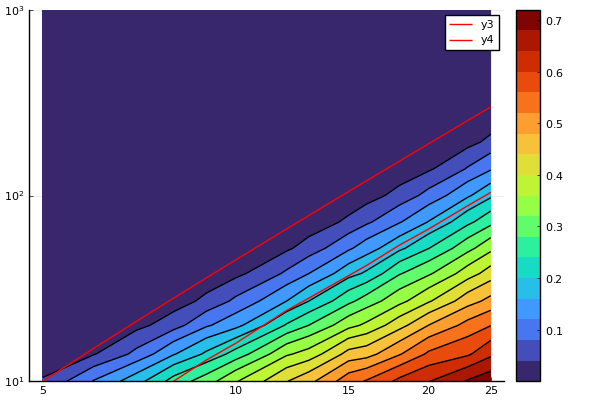

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [70]:
contourf(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=[:black],
)
plot!(dims, rankBound.(dims, d), color=:red, ylims=(10, 1000))
plot!(dims, catalecticant.(dims, d), color=:red, ylims=(10, 1000))

In [75]:
d = 3;

eigmins = []
for n in dims
    # C = reshape(moment(n, d), (n^d, 1))
    Cnorm = momentNorm(n, d);
    row = []
    for r in ranks
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d .- Cnorm
            # X = A .- C
            # G = X'*X
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, mean(eigmins_))
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins);

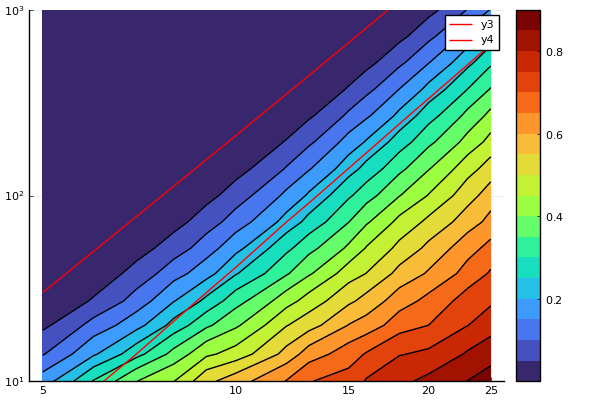

In [76]:
contourf(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=[:black],
)
plot!(dims, rankBound.(dims, d), color=:red, ylims=(10, 1000))
plot!(dims, catalecticant.(dims, d), color=:red, ylims=(10, 1000))

In [77]:
d = 4;

eigmins = []
for n in dims
    # C = reshape(moment(n, d), (n^d, 1))
    Cnorm = momentNorm(n, d);
    row = []
    for r in ranks
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d .- Cnorm
            # X = A .- C
            # G = X'*X
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, mean(eigmins_))
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins);

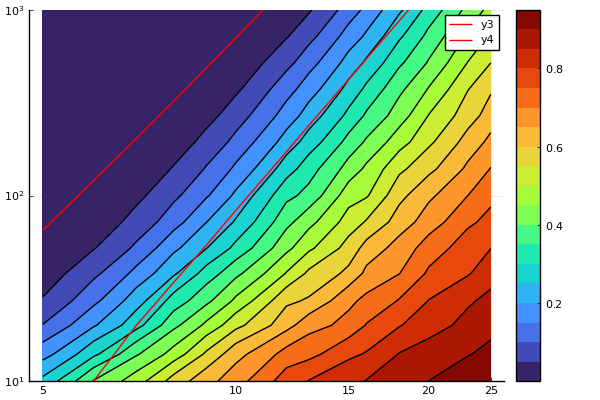

In [83]:
contourf(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=[:black],
)
plot!(dims, rankBound.(dims, d), color=:red, ylims=(10, 1000))
plot!(dims, catalecticant.(dims, d), color=:red, ylims=(10, 1000))

In [113]:
d = 5;

eigmins = []
for n in dims
    # C = reshape(moment(n, d), (n^d, 1))
    Cnorm = momentNorm(n, d);
    row = []
    for r in ranks
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d .- Cnorm
            # X = A .- C
            # G = X'*X
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, mean(eigmins_))
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins);

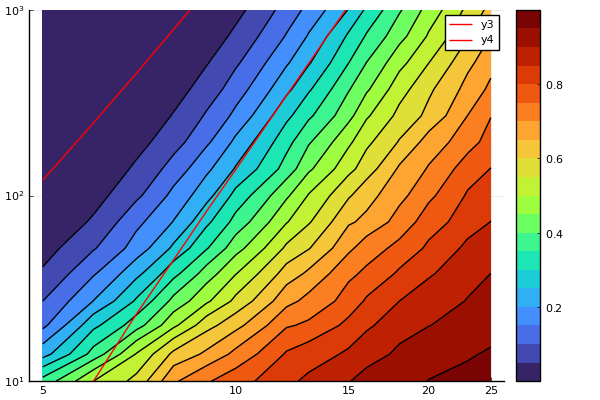

In [114]:
contourf(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=[:black],
)

plot!(dims, rankBound.(dims, d), color=:red, ylims=(10, 1000))
plot!(dims, catalecticant.(dims, d), color=:red, ylims=(10, 1000))

In [115]:
d = 6;

eigmins = []
for n in dims
    # C = reshape(moment(n, d), (n^d, 1))
    Cnorm = momentNorm(n, d);
    row = []
    for r in ranks
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d .- Cnorm
            # X = A .- C
            # G = X'*X
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, mean(eigmins_))
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins);

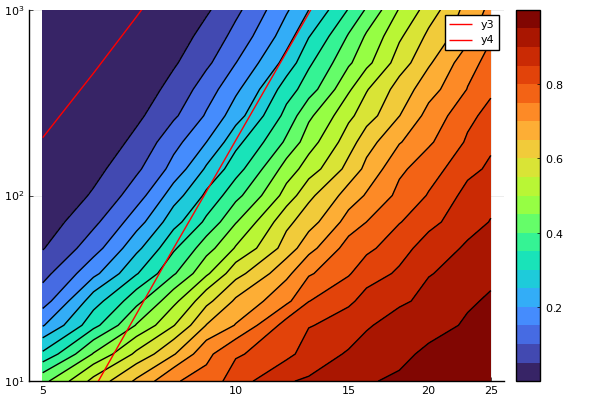

In [116]:
contourf(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(eigmins), 
    levels=20, 
    color=[:black],
)

plot!(dims, rankBound.(dims, d), color=:red, ylims=(10, 1000))
plot!(dims, catalecticant.(dims, d), color=:red, ylims=(10, 1000))